In [131]:
# %run -i 'load_data.py'
import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
from scipy.stats import chisquare
from scipy.stats import combine_pvalues
%run -i 'test_functions.py'

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [317]:
chen_data_out = test_anova_filters(chen_PSI, chen_mrna_counts, mrna_per_event_chen, 
                chen_read_counts, chen_coverage_tab, chen_pca_clust, clusters = 'AC',  psi_min = 0.05, obs_min = 0.5, 
                      mrna_min = 10, read_min =10, dset_name = 'chen dataset;', correct_multitest = False)

intermediate exons: 1117


HBox(children=(IntProgress(value=0, max=1117), HTML(value='')))

not pass: 84
tested exons: 1033


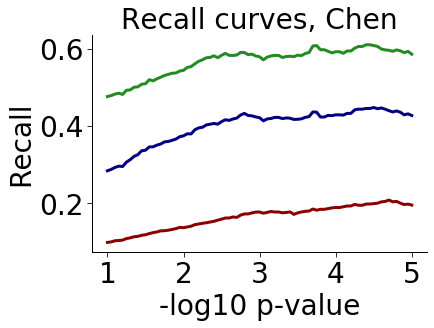

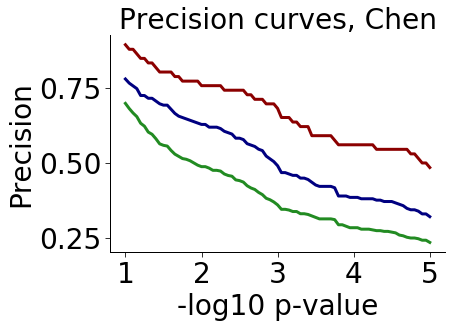

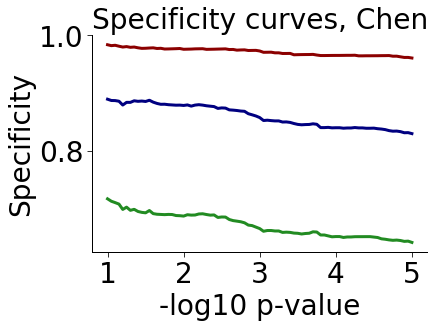

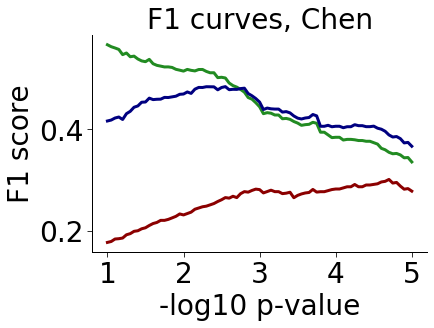

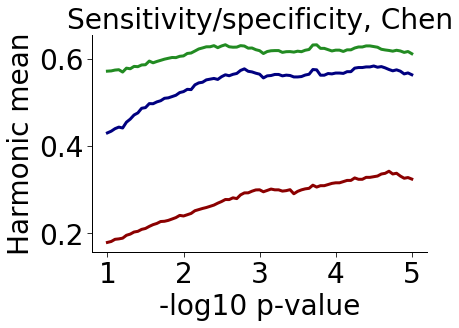

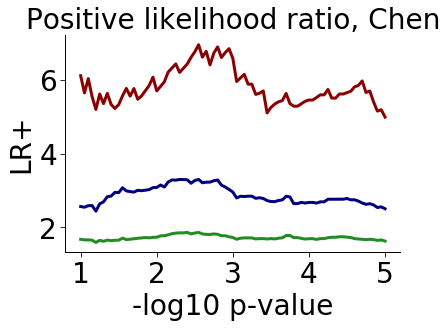

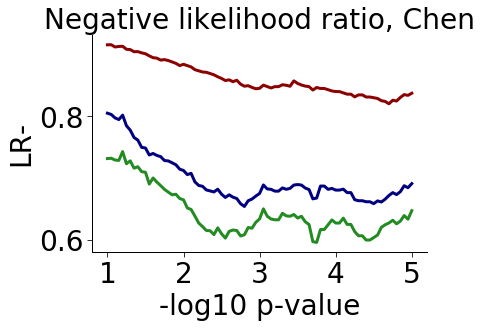

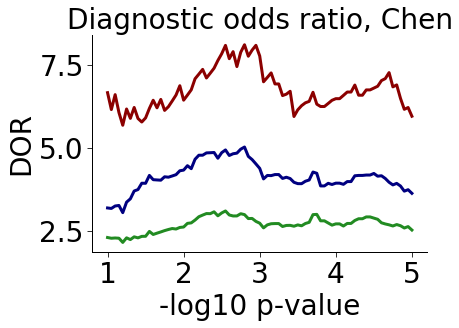

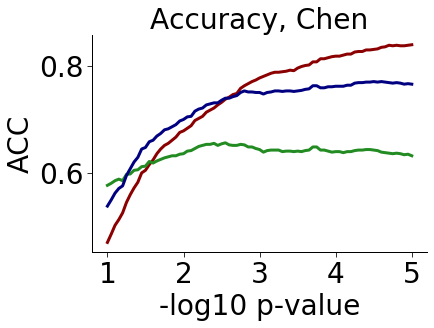

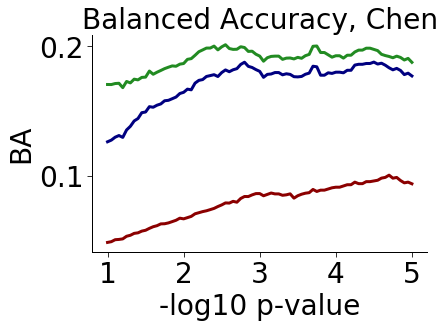

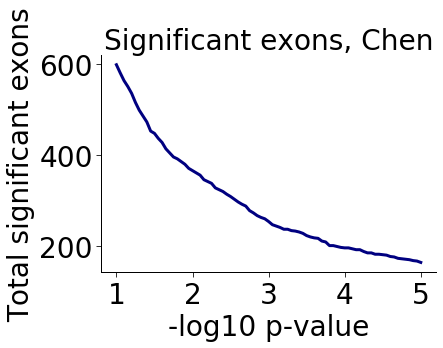

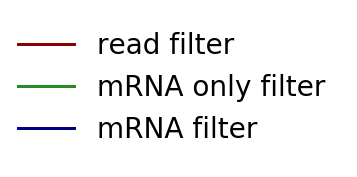

In [318]:
# figsize(6,4)
summary_plots(chen_data_out, dset_name='Chen', 
              p_lim=0.1, p_low = 0.00001, p_steps = 0.05, linear_p=False, beta=1)

In [319]:
song_data_out = test_anova_filters(song_PSI, song_mrna_counts, mrna_per_event_song, 
                song_read_counts, song_coverage_tab, song_pca_clust, clusters = 'AC',  psi_min = 0.05, obs_min = 0.5, 
                      mrna_min = 10, read_min =10, dset_name = 'song dataset;', correct_multitest = False)

intermediate exons: 896


HBox(children=(IntProgress(value=0, max=896), HTML(value='')))

not pass: 517
tested exons: 379


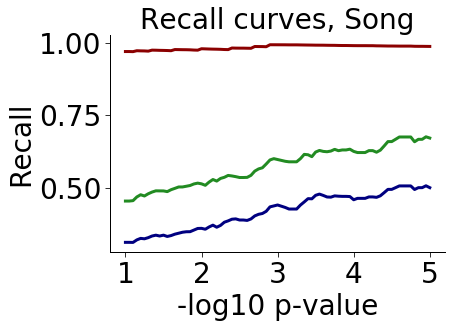

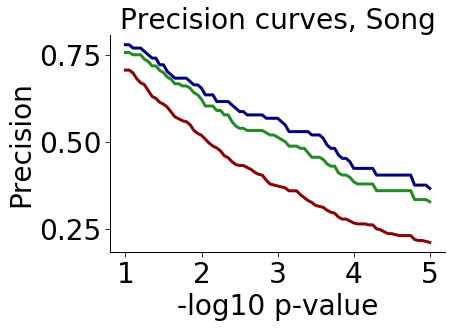

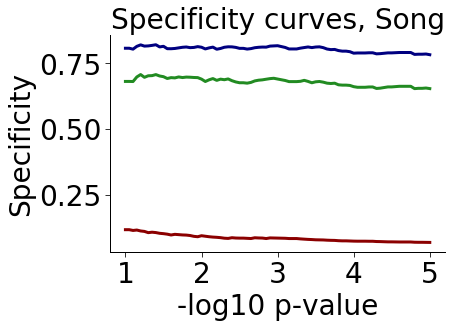

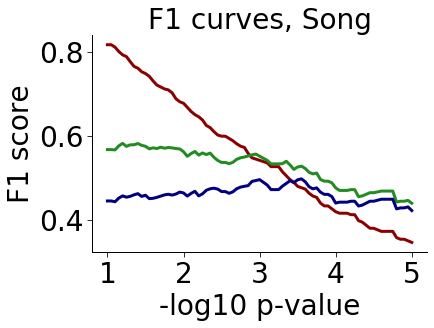

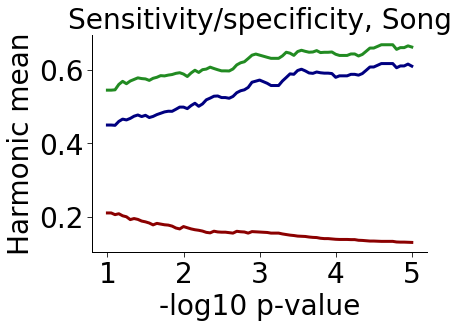

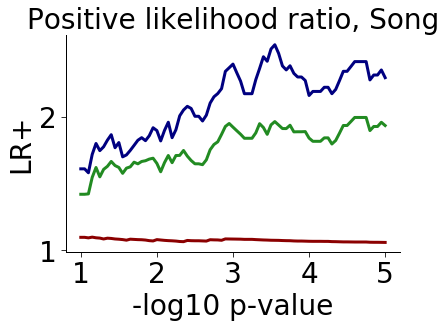

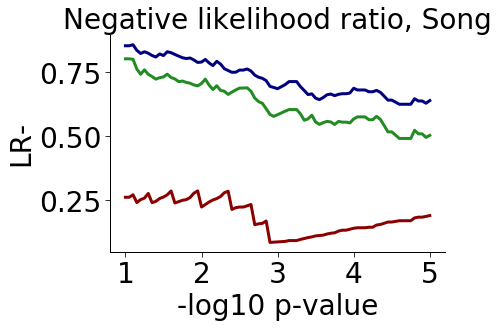

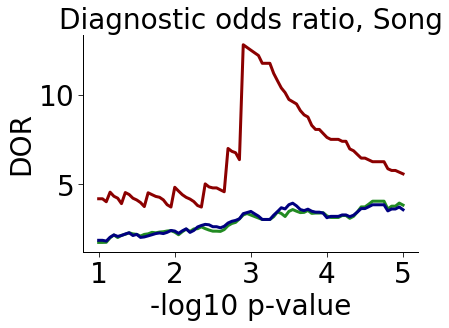

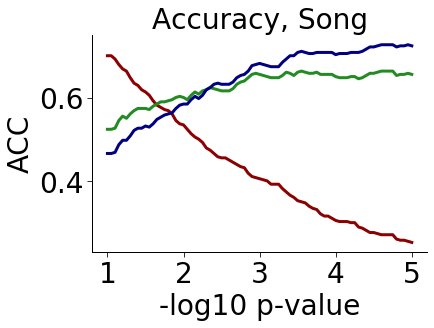

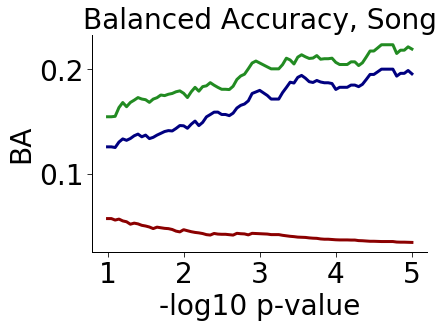

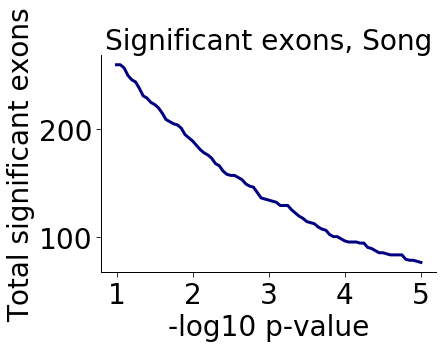

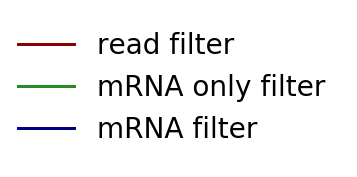

In [320]:
# figsize(6,4)
summary_plots(song_data_out, dset_name='Song', 
              p_lim=0.1, p_low = 0.00001, p_steps = 0.05, linear_p=False, beta=1)

In [145]:
lescroart_data_out = test_anova_filters(lescroart_PSI, lescroart_mrna_counts, mrna_per_event_lescroart, 
                lescroart_read_counts, lescroart_coverage_tab, lescroart_pca_clust, clusters = 'AC',  psi_min = 0.05, obs_min = 0.5, 
                      mrna_min = 10, read_min =10, dset_name = 'lescroart dataset;', correct_multitest = False)

intermediate exons: 918


HBox(children=(IntProgress(value=0, max=918), HTML(value='')))

not pass: 713
tested exons: 205


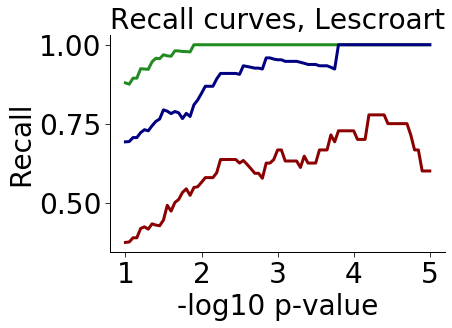

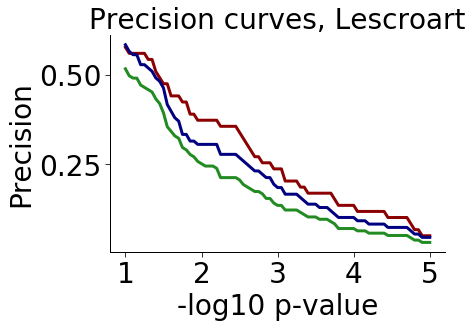

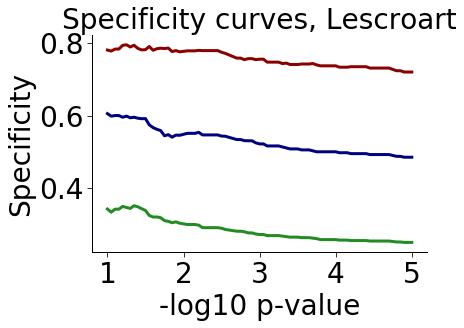

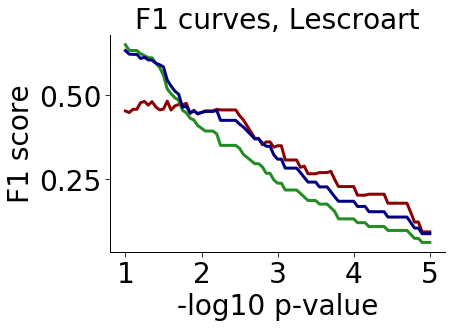

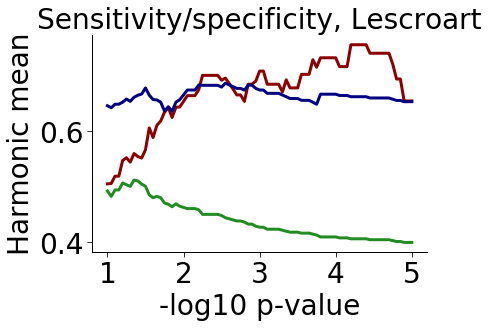

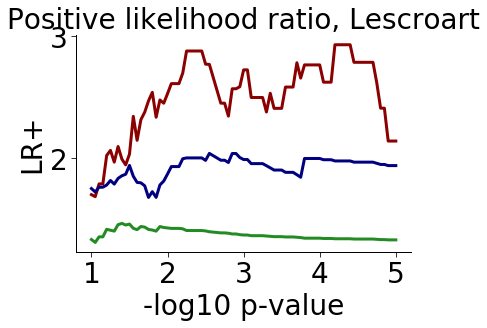

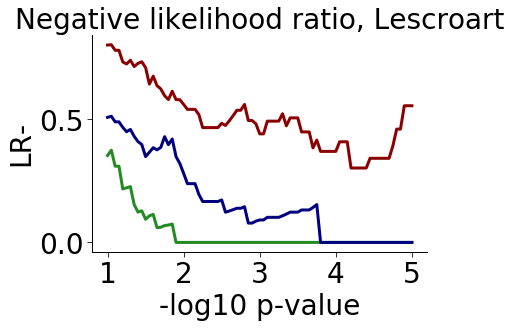

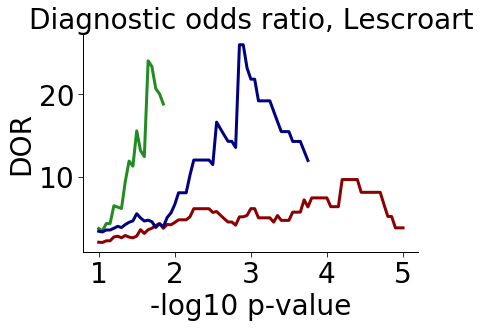

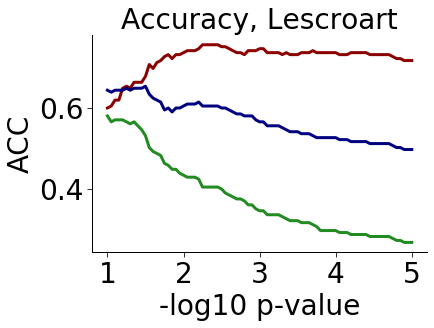

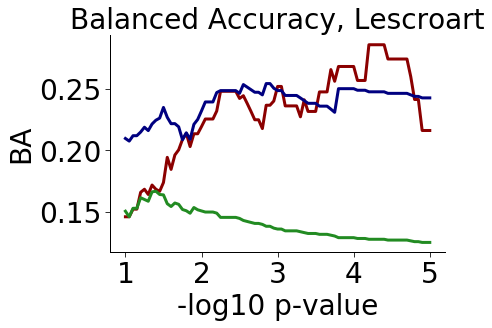

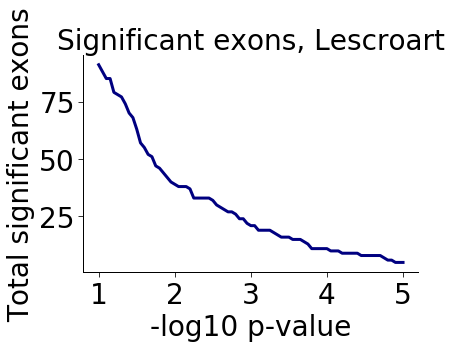

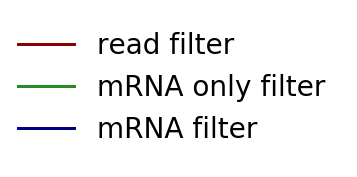

In [38]:
# figsize(6,4)
summary_plots(lescroart_data_out, dset_name='Lescroart', 
              p_lim=0.1, p_low = 0.00001, p_steps = 0.05, linear_p=False, beta=1)

In [146]:
trapnell_data_out = test_anova_filters(trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                trapnell_read_counts, trapnell_coverage_tab, trapnell_pca_clust, clusters = 'AC',  psi_min = 0.05, obs_min = 0.5, 
                      mrna_min = 10, read_min =10, dset_name = 'trapnell dataset;', correct_multitest = False)

intermediate exons: 809


HBox(children=(IntProgress(value=0, max=809), HTML(value='')))

not pass: 96
tested exons: 713


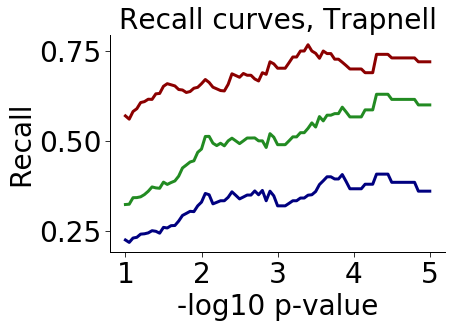

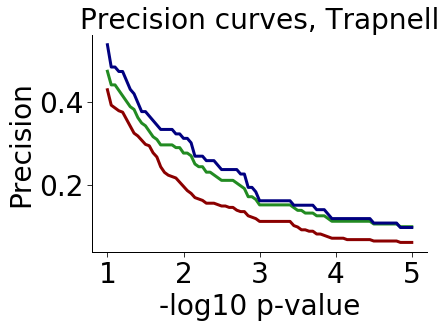

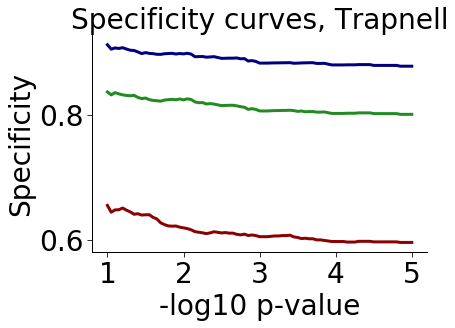

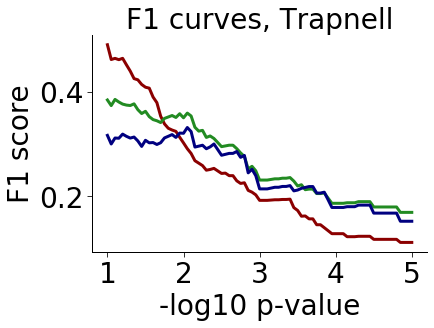

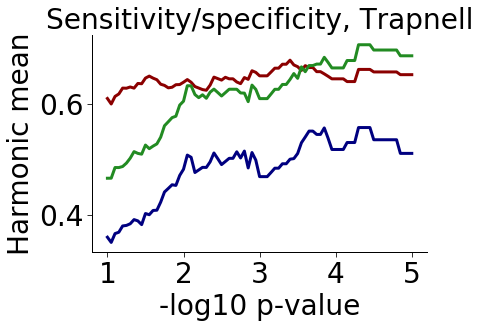

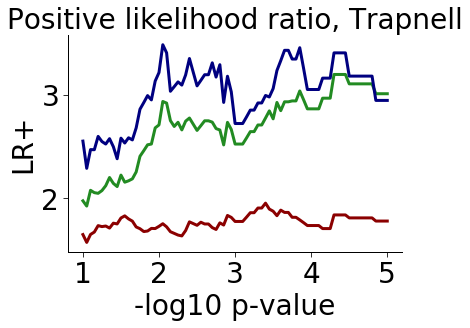

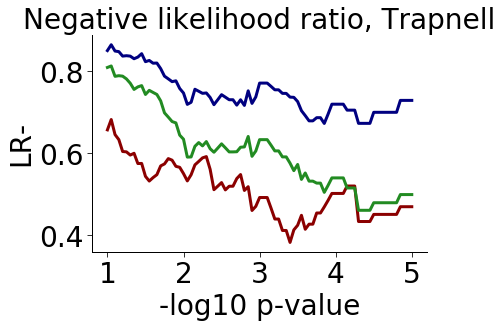

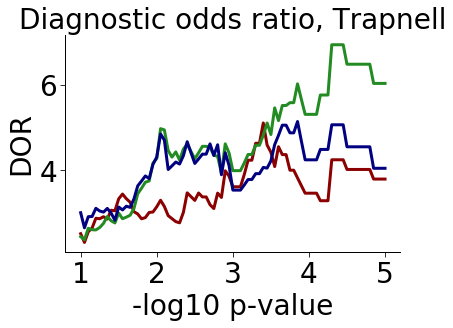

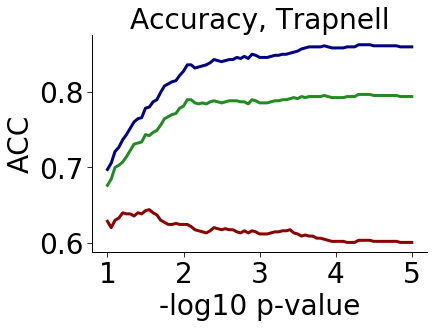

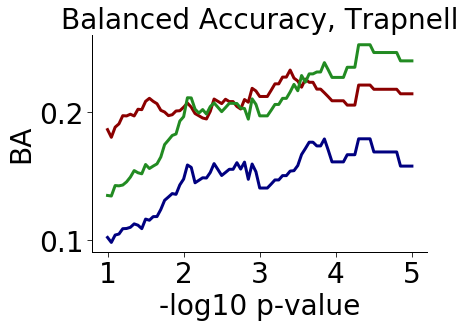

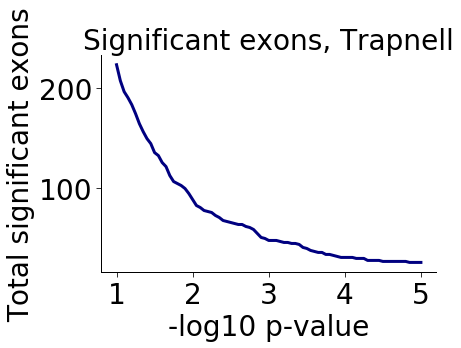

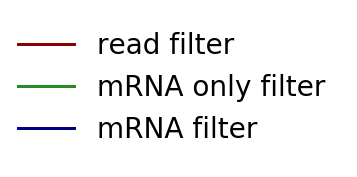

In [40]:
# figsize(6,4)
summary_plots(trapnell_data_out, dset_name='Trapnell', 
              p_lim=0.1, p_low = 0.00001, p_steps = 0.05, linear_p=False, beta=1)

In [29]:
# %run -i 'test_filter_finctions.py'

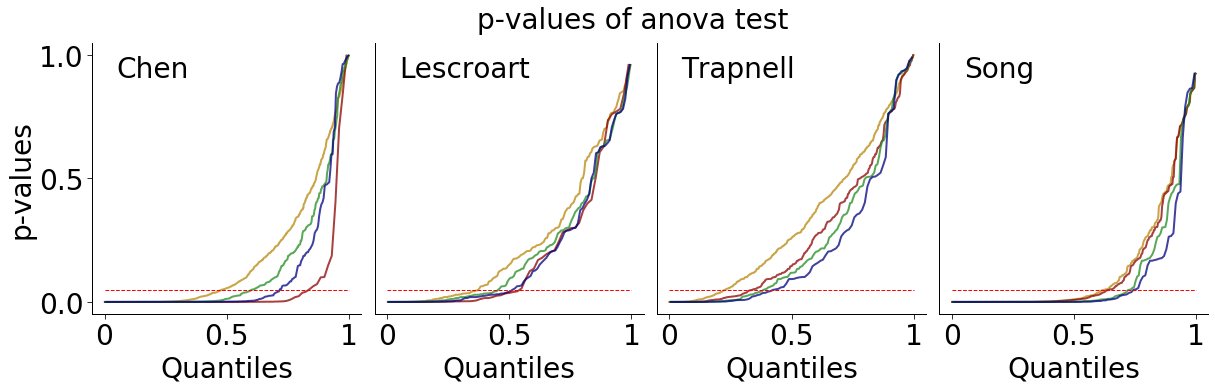

In [147]:
def plot_pvalues(ax, test_data):
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    current_palette = sns.color_palette('dark')
    
    pplot_1 = probplot(pvals.pvals, dist='uniform')[0]
    pplot_2 = probplot(pvals.loc[selected_read, 'pvals'], dist='uniform')[0]
    pplot_3 = probplot(pvals.loc[selected_mrna_only, 'pvals'], dist='uniform')[0]
    pplot_4 = probplot(pvals.loc[selected_mrna, 'pvals'], dist='uniform')[0]
    
    ax.plot(pplot_1[0], pplot_1[1], alpha = 0.75, c=current_palette[4], label='all exons', linewidth=2)
    ax.plot(pplot_2[0], pplot_2[1], alpha = 0.75, c='darkred', label='read filter', linewidth=2)
    ax.plot(pplot_3[0], pplot_3[1], alpha = 0.75, c='forestgreen', label='mRNA only filter', linewidth=2)
    ax.plot(pplot_4[0], pplot_4[1], alpha = 0.75, c='navy', label='combined filter', linewidth=2)
    ax.plot([0, 1], [0.05, 0.05], 'r--', linewidth=1)
    ax.set_xlabel('Quantiles', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels(['0', '0.5', '1'])
    
    ax.tick_params(labelsize=28, length=5)
    
    
    
    
    
    
figsize(20, 5)
fig = plt.figure()

fig.suptitle('p-values of anova test', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((-0.05,1.05))
ax_2.set_ylim((-0.05,1.05))
ax_3.set_ylim((-0.05,1.05))
ax_4.set_ylim((-0.05,1.05))

plot_pvalues(ax_1, chen_data_out)
plot_pvalues(ax_2, lescroart_data_out)
plot_pvalues(ax_3, trapnell_data_out)
plot_pvalues(ax_4, song_data_out)

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')


ax_1.text(0.05, 1, 'Chen', fontsize=28, verticalalignment='top')
ax_2.text(0.05, 1, 'Lescroart', fontsize=28, verticalalignment='top')
ax_3.text(0.05, 1, 'Trapnell', fontsize=28, verticalalignment='top')
ax_4.text(0.05, 1, 'Song', fontsize=28, verticalalignment='top')

# ax_3.set_xticks([0, 0.5, 1], ['0', '0.5', '1'])
            
ax_1.set_ylabel('p-values', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/anova/pvalues.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




In [214]:
def run_hypergeom_test(test_data):
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    M = len(pvals)
    n = np.sum((pvals <= 0.05).pvals)
    
    N_mrna = len(selected_mrna)
    k_mrna = np.sum((pvals.loc[selected_mrna] <= 0.05).pvals)
    
    N_mrna_only = len(selected_mrna_only)
    k_mrna_only = np.sum((pvals.loc[selected_mrna_only] <= 0.05).pvals)
    
    N_read = len(selected_read)
    k_read = np.sum((pvals.loc[selected_read] <= 0.05).pvals)
    
    hyper_pvals = []
    hyper_pvals.append(hyper_test(M, n, N_read, k_read)[1])
    hyper_pvals.append(hyper_test(M, n, N_mrna_only, k_mrna_only)[1])
    hyper_pvals.append(hyper_test(M, n, N_mrna, k_mrna)[1])
    
    
    return M, n, [N_read, N_mrna_only, N_mrna], [k_read, k_mrna_only, k_mrna], hyper_pvals
    
chen_hyper_results = run_hypergeom_test(chen_data_out)
lescroart_hyper_results = run_hypergeom_test(lescroart_data_out)
trapnell_hyper_results = run_hypergeom_test(trapnell_data_out)
song_hyper_results = run_hypergeom_test(song_data_out)


total_M = [chen_hyper_results[0]]*3 + [lescroart_hyper_results[0]]*3 + [trapnell_hyper_results[0]]*3 + [song_hyper_results[0]]*3
total_n = [chen_hyper_results[1]]*3 + [lescroart_hyper_results[1]]*3 + [trapnell_hyper_results[1]]*3 + [song_hyper_results[1]]*3
total_N = chen_hyper_results[2] + lescroart_hyper_results[2] + trapnell_hyper_results[2] + song_hyper_results[2]
total_k = chen_hyper_results[3] + lescroart_hyper_results[3] + trapnell_hyper_results[3] + song_hyper_results[3]
total_pvals = chen_hyper_results[4] + lescroart_hyper_results[4] + trapnell_hyper_results[4] + song_hyper_results[4]
corrected_pvals = multipletests(total_pvals, method='fdr_bh')[1]

hyper_table = pd.DataFrame()
hyper_table['Dataset'] = ['Chen']*3 + ['Lescroart']*3 + ['Trapnell']*3 + ['Song']*3
hyper_table['Total exons'] = total_M
hyper_table['Significant change'] = total_n
hyper_table['Proportion'] = np.array(total_n)/np.array(total_M)
hyper_table['Filter'] = ['reads', 'mRNA only', 'mRNA']*4
hyper_table['Total selected'] = total_N
hyper_table['Significant selected'] = total_k
hyper_table['Proportion selected'] = np.array(total_k)/np.array(total_N)
hyper_table['Fold enrichment'] = hyper_table['Proportion selected'] / hyper_table['Proportion']
hyper_table['p-values'] = total_pvals
hyper_table['adjusted p-values'] = corrected_pvals

In [215]:
hyper_table.head()

,Dataset,Total exons,Significant change,Proportion,Filter,Total selected,Significant selected,Proportion selected,Fold enrichment,p-values,adjusted p-values
0,Chen,1033,499,0.483059,reads,66,55,0.833333,1.725117,1.289371e-09,5.157486e-09
1,Chen,1033,499,0.483059,mRNA only,408,246,0.602941,1.248173,3.153122e-10,1.891873e-09
2,Chen,1033,499,0.483059,mRNA,218,156,0.715596,1.481385,4.857694e-15,5.829232e-14
3,Lescroart,205,77,0.375610,reads,59,32,0.542373,1.443980,1.585009e-03,1.729101e-03
4,Lescroart,205,77,0.375610,mRNA only,155,71,0.458065,1.219522,6.543150e-06,9.814725e-06


In [328]:
def get_fold_enrichment(test_data, pval):
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    M = len(pvals)
    n = np.sum((pvals <= pval).pvals)
    
    N_mrna = len(selected_mrna)
    k_mrna = np.sum((pvals.loc[selected_mrna] <= pval).pvals)
    
    N_mrna_only = len(selected_mrna_only)
    k_mrna_only = np.sum((pvals.loc[selected_mrna_only] <= pval).pvals)
    
    N_read = len(selected_read)
    k_read = np.sum((pvals.loc[selected_read] <= pval).pvals)
    
    mrna_enrichment = (k_mrna*M)/(n*N_mrna)
    mrna_only_enrichment = (k_mrna_only*M)/(n*N_mrna_only)
    read_enrichment = (k_read*M)/(n*N_read)
    
    return read_enrichment, mrna_only_enrichment, mrna_enrichment, M, n, N_read, k_read, N_mrna_only, k_mrna_only, N_mrna, k_mrna 
    
def get_enrichment(test_data):
    p_limits = 10**(-np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05))
    read_enrichment = []
    mrna_only_enrichment = []
    mrna_enrichment = []
    
    read_pvals = []
    mrna_only_pvals = []
    mrna_pvals = []
    
    for x in p_limits:
        enrich = get_fold_enrichment(test_data, x)
        read_enrichment.append(enrich[0])
        mrna_only_enrichment.append(enrich[1])
        mrna_enrichment.append(enrich[2])
        
        read_pvals.append(hyper_test(enrich[3], enrich[4], enrich[5], enrich[6])[1])
        mrna_only_pvals.append(hyper_test(enrich[3], enrich[4], enrich[7], enrich[8])[1])
        mrna_pvals.append(hyper_test(enrich[3], enrich[4], enrich[9], enrich[10])[1])
        
#     read_padj = multipletests(read_pvals, method='fdr_bh')[1]
#     mrna_only_padj = multipletests(mrna_only_pvals, method='fdr_bh')[1]
#     mrna_padj = multipletests(mrna_pvals, method='fdr_bh')[1]

    corrected = multipletests(read_pvals + mrna_only_pvals + mrna_pvals, method='fdr_bh')[1]
    read_padj = corrected[:len(p_limits)]
    mrna_only_padj = corrected[len(p_limits):2*len(p_limits)]
    mrna_padj = corrected[2*len(p_limits):]
        
    return read_enrichment, mrna_only_enrichment, mrna_enrichment, read_padj, mrna_only_padj, mrna_padj

In [329]:
chen_enrichment = get_enrichment(chen_data_out)
lescroart_enrichment = get_enrichment(lescroart_data_out)
trapnell_enrichment = get_enrichment(trapnell_data_out)
song_enrichment = get_enrichment(song_data_out)


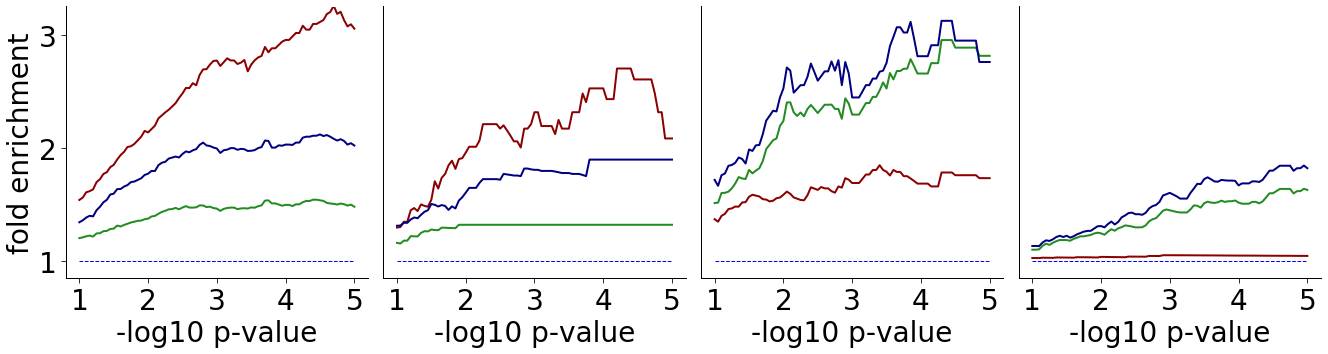

In [334]:
def plot_filter_lines(ax, read, mrna_only, mrna):
        
    current_palette = sns.color_palette('dark')
    
    ax.plot((np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05)), read, c='darkred', 
            label='read filter', linewidth=2)
    ax.plot((np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05)), mrna_only, c='forestgreen', 
            label='mrna only filter', linewidth=2)
    ax.plot((np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05)), mrna, c='navy', 
            label='combined filter', linewidth=2)
    
    
    ax.set_xlabel('-log10 p-value', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_xticklabels(['1', '2', '3', '4', '5'])
    
    ax.tick_params(labelsize=28, length=5)
    
    
figsize(22.5, 5)

fig = plt.figure()

# fig.suptitle('', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((0.85,3.25))
ax_2.set_ylim((0.85,3.25))
ax_3.set_ylim((0.85,3.25))
ax_4.set_ylim((0.85,3.25))

plot_filter_lines(ax_1, chen_enrichment[0], chen_enrichment[1], chen_enrichment[2])
plot_filter_lines(ax_2, lescroart_enrichment[0], lescroart_enrichment[1], lescroart_enrichment[2])
plot_filter_lines(ax_3, trapnell_enrichment[0], trapnell_enrichment[1], trapnell_enrichment[2])
plot_filter_lines(ax_4, song_enrichment[0], song_enrichment[1], song_enrichment[2])

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')


# ax_1.text(0.05, 1, 'Chen', fontsize=28, verticalalignment='top')
# ax_2.text(0.05, 1, 'Lescroart', fontsize=28, verticalalignment='top')
# ax_3.text(0.05, 1, 'Trapnell', fontsize=28, verticalalignment='top')
# ax_4.text(0.05, 1, 'Song', fontsize=28, verticalalignment='top')

ax_1.plot([1, 5], [1, 1], 'b--', linewidth=1)
ax_2.plot([1, 5], [1, 1], 'b--', linewidth=1)
ax_3.plot([1, 5], [1, 1], 'b--', linewidth=1)
ax_4.plot([1, 5], [1, 1], 'b--', linewidth=1)

# ax_3.set_xticks([0, 0.5, 1], ['0', '0.5', '1'])
            
ax_1.set_ylabel('fold enrichment', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/anova/enrichment.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/enrichment.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/enrichment.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




In [335]:
# figsize(20, 5)
# fig = plt.figure()

# # fig.suptitle('', fontsize=28)

# gs = GridSpec(1,4)
# gs.update(wspace=0.05, hspace=1.05)

# ax_1 = fig.add_subplot(gs[0,0])
# ax_2 = fig.add_subplot(gs[0,1])
# ax_3 = fig.add_subplot(gs[0,2])
# ax_4 = fig.add_subplot(gs[0,3])

# ax_1.set_ylim((-0.05,25))
# ax_2.set_ylim((-0.05, 25))
# ax_3.set_ylim((-0.05, 25))
# ax_4.set_ylim((-0.05,25))

# plot_filter_lines(ax_1, -np.log10(chen_enrichment[3]), 
#                   -np.log10(chen_enrichment[4]), -np.log10(chen_enrichment[5]))
# plot_filter_lines(ax_2, -np.log10(lescroart_enrichment[3]), 
#                   -np.log10(lescroart_enrichment[4]), -np.log10(lescroart_enrichment[5]))
# plot_filter_lines(ax_3, -np.log10(trapnell_enrichment[3]), 
#                   -np.log10(trapnell_enrichment[4]), -np.log10(trapnell_enrichment[5]))
# plot_filter_lines(ax_4, -np.log10(song_enrichment[3]), 
#                   -np.log10(song_enrichment[4]), -np.log10(song_enrichment[5]))

# ax_1.plot([1, 5], -np.log10([0.05, 0.05]), 'r--', linewidth=1)
# ax_2.plot([1, 5], -np.log10([0.05, 0.05]), 'r--', linewidth=1)
# ax_3.plot([1, 5], -np.log10([0.05, 0.05]), 'r--', linewidth=1)
# ax_4.plot([1, 5], -np.log10([0.05, 0.05]), 'r--', linewidth=1)

# plt.setp(ax_2.get_yticklabels(), visible=False)
# plt.setp(ax_3.get_yticklabels(), visible=False)
# plt.setp(ax_4.get_yticklabels(), visible=False)
# ax_2.yaxis.set_ticks_position('none')
# ax_3.yaxis.set_ticks_position('none')
# ax_4.yaxis.set_ticks_position('none')
            
# ax_1.set_ylabel('enrichment p-value', fontsize = 28)

# plt.savefig('plots_review/figure3/anova/enrichment_pvals.svg', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/anova/enrichment_pvals.pdf', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/anova/enrichment_pvals.png', dpi=300, bbox_inches='tight', transparent=True)

# plt.show()




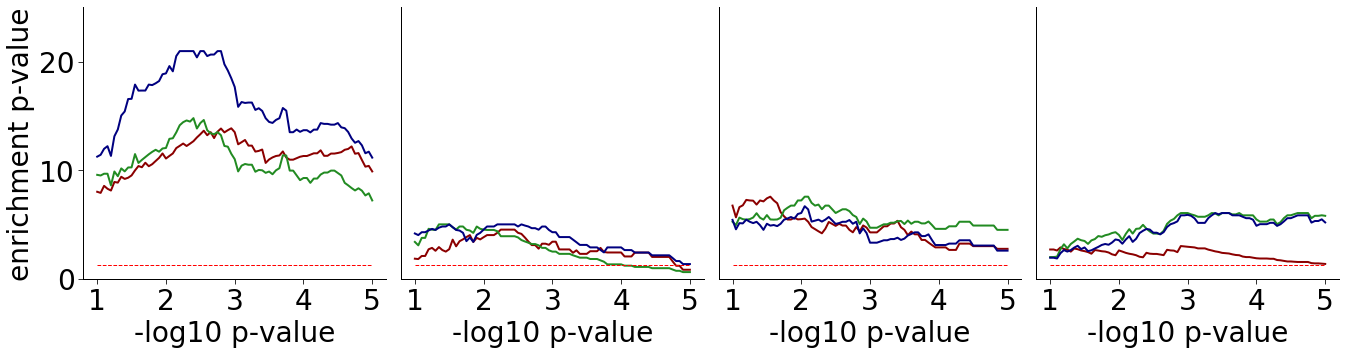

In [336]:
figsize(22.5, 5)

fig = plt.figure()

# fig.suptitle('', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((-0.05,25))
ax_2.set_ylim((-0.05, 25))
ax_3.set_ylim((-0.05, 25))
ax_4.set_ylim((-0.05,25))

plot_filter_lines(ax_1, -np.log10(chen_enrichment[3]), 
                  -np.log10(chen_enrichment[4]), -np.log10(chen_enrichment[5]))
plot_filter_lines(ax_2, -np.log10(lescroart_enrichment[3]), 
                  -np.log10(lescroart_enrichment[4]), -np.log10(lescroart_enrichment[5]))
plot_filter_lines(ax_3, -np.log10(trapnell_enrichment[3]), 
                  -np.log10(trapnell_enrichment[4]), -np.log10(trapnell_enrichment[5]))
plot_filter_lines(ax_4, -np.log10(song_enrichment[3]), 
                  -np.log10(song_enrichment[4]), -np.log10(song_enrichment[5]))

ax_1.plot([1, 5], -np.log10([0.05, 0.05]), 'r--', linewidth=1)
ax_2.plot([1, 5], -np.log10([0.05, 0.05]), 'r--', linewidth=1)
ax_3.plot([1, 5], -np.log10([0.05, 0.05]), 'r--', linewidth=1)
ax_4.plot([1, 5], -np.log10([0.05, 0.05]), 'r--', linewidth=1)

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')
            
ax_1.set_ylabel('enrichment p-value', fontsize = 28)

plt.savefig('plots_review/figure3/anova/enrichment_pvals.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/enrichment_pvals.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/enrichment_pvals.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




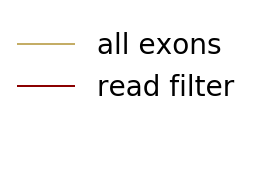

In [140]:
figsize(4,3)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

# ax.plot([], 'r--', linewidth=2, label='pval = 0.05')
ax.plot([], c=current_palette[4], label='all exons', linewidth=2)
ax.plot([], c='darkred', label='read filter', linewidth=2)
# ax.plot([], c='forestgreen', label='mRNA only filter', linewidth=5)
# ax.plot([], c='navy', label='combined filter', linewidth=5)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend(fontsize=28, frameon=False)

plt.savefig('plots_review/figure3/anova/pvalues_labels_1.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues_labels_1.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues_labels_1.png', bbox_inches='tight', transparent=True)
plt.show()

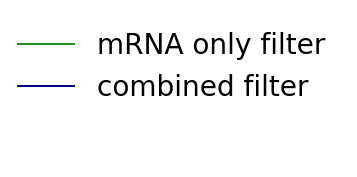

In [141]:
figsize(4,3)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

# ax.plot([], 'r--', linewidth=2, label='pval = 0.05')
# ax.plot([], c=current_palette[4], label='all exons', linewidth=5)
# ax.plot([], c='darkred', label='read filter', linewidth=5)
ax.plot([], c='forestgreen', label='mRNA only filter', linewidth=2)
ax.plot([], c='navy', label='combined filter', linewidth=2)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend(fontsize=28, frameon=False)

plt.savefig('plots_review/figure3/anova/pvalues_labels_2.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues_labels_2.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues_labels_2.png', bbox_inches='tight', transparent=True)
plt.show()

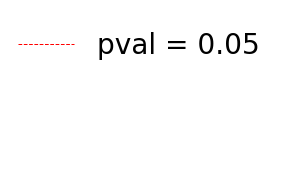

In [142]:
figsize(4,3)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

ax.plot([], 'r--', linewidth=1, label='pval = 0.05')
# ax.plot([], c=current_palette[4], label='all exons', linewidth=5)
# ax.plot([], c='darkred', label='read filter', linewidth=5)
# ax.plot([], c='forestgreen', label='mRNA only filter', linewidth=5)
# ax.plot([], c='navy', label='combined filter', linewidth=5)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend(fontsize=28, frameon=False)

plt.savefig('plots_review/figure3/anova/pvalues_labels_3.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues_labels_3.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/pvalues_labels_3.png', bbox_inches='tight', transparent=True)
plt.show()

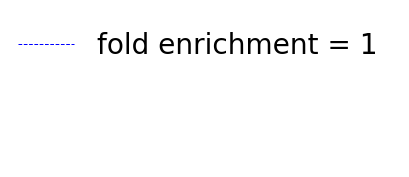

In [333]:
figsize(4,3)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

ax.plot([], 'b--', linewidth=1, label='fold enrichment = 1')
# ax.plot([], c=current_palette[4], label='all exons', linewidth=5)
# ax.plot([], c='darkred', label='read filter', linewidth=5)
# ax.plot([], c='forestgreen', label='mRNA only filter', linewidth=5)
# ax.plot([], c='navy', label='combined filter', linewidth=5)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend(fontsize=28, frameon=False)

plt.savefig('plots_review/figure3/anova/enrichment_score_label.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/enrichment_score_label.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/enrichment_score_label.png', bbox_inches='tight', transparent=True)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

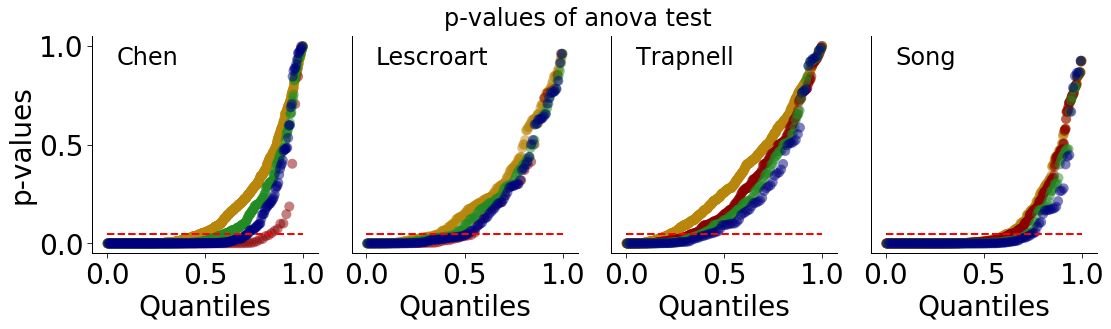

In [148]:
def plot_pvalues(ax, test_data):
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    current_palette = sns.color_palette('dark')
    
    pplot_1 = probplot(pvals.pvals, dist='uniform')[0]
    pplot_2 = probplot(pvals.loc[selected_read, 'pvals'], dist='uniform')[0]
    pplot_3 = probplot(pvals.loc[selected_mrna_only, 'pvals'], dist='uniform')[0]
    pplot_4 = probplot(pvals.loc[selected_mrna, 'pvals'], dist='uniform')[0]
    
    ax.scatter(pplot_1[0], pplot_1[1], alpha = 0.5, c=current_palette[4], label='all exons', edgecolors='none', s=100)
    ax.scatter(pplot_2[0], pplot_2[1], alpha = 0.5, c='darkred', label='read filter', edgecolors='none', s=100)
    ax.scatter(pplot_3[0], pplot_3[1], alpha = 0.5, c='forestgreen', label='mRNA only filter', edgecolors='none', s=100)
    ax.scatter(pplot_4[0], pplot_4[1], alpha = 0.5, c='navy', label='combined filter', edgecolors='none', s=100)
    ax.plot([0, 1], [0.05, 0.05], 'r--', linewidth=2)
    ax.set_xlabel('Quantiles', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels(['0.0', '0.5', '1.0'])
    
    ax.tick_params(labelsize=28, length=5)
    
    
    
    
    
    
figsize(18, 4)
fig = plt.figure()

fig.suptitle('p-values of anova test', fontsize=24)

gs = GridSpec(1,4)
gs.update(wspace=0.15, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((-0.05,1.05))
ax_2.set_ylim((-0.05,1.05))
ax_3.set_ylim((-0.05,1.05))
ax_4.set_ylim((-0.05,1.05))

plot_pvalues(ax_1, chen_data_out)
plot_pvalues(ax_2, lescroart_data_out)
plot_pvalues(ax_3, trapnell_data_out)
plot_pvalues(ax_4, song_data_out)

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')


ax_1.text(0.05, 1, 'Chen', fontsize=24, verticalalignment='top')
ax_2.text(0.05, 1, 'Lescroart', fontsize=24, verticalalignment='top')
ax_3.text(0.05, 1, 'Trapnell', fontsize=24, verticalalignment='top')
ax_4.text(0.05, 1, 'Song', fontsize=24, verticalalignment='top')

# ax_3.set_xticks([0, 0.5, 1], ['0', '0.5', '1'])
            
ax_1.set_ylabel('p-values', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/anova/pvalues_scatter.svg', bbox_inches='tight')
plt.savefig('plots_review/figure3/anova/pvalues_scatter.pdf', bbox_inches='tight')
plt.savefig('plots_review/figure3/anova/pvalues_scatter.png', dpi=300, bbox_inches='tight')

plt.show()




'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


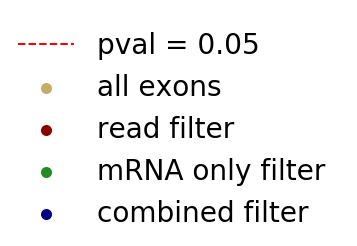

In [137]:
figsize(4,3)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

ax.plot([], 'r--', linewidth=2, label='pval = 0.05')
ax.scatter([], [], c=current_palette[4], label='all exons', linewidth=5)
ax.scatter([], [], c='darkred', label='read filter', linewidth=5)
ax.scatter([], [], c='forestgreen', label='mRNA only filter', linewidth=5)
ax.scatter([], [], c='navy', label='combined filter', linewidth=5)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend(fontsize=28, frameon=False)

plt.savefig('plots_review/figure3/anova/pvalues_scatter_labels.svg', bbox_inches='tight')
plt.savefig('plots_review/figure3/anova/pvalues_scatter_labels.pdf', bbox_inches='tight')
plt.savefig('plots_review/figure3/anova/pvalues_scatter_labels.png', bbox_inches='tight')
plt.show()

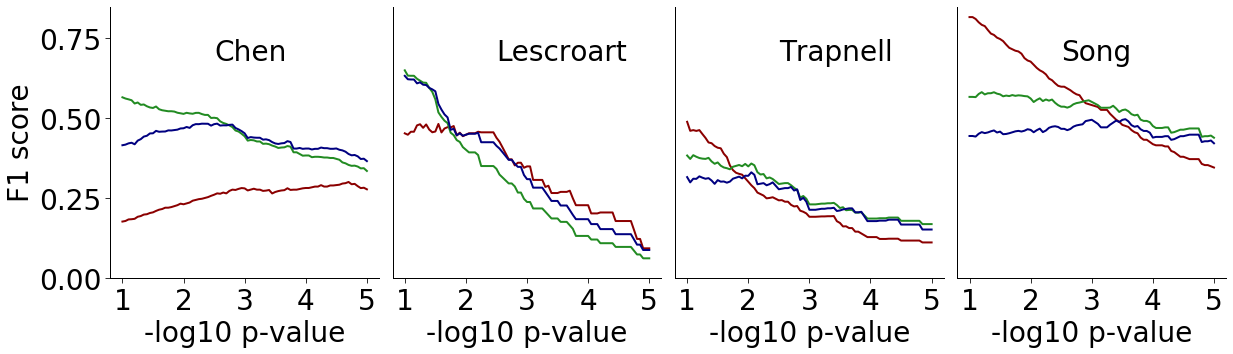

In [162]:
def plot_curves(ax, test_data, which_curve = 0):
    
    names = ['Recall', 'Precision', 'Specificity', 'F1 score', 'Recall/Specificity', 
             'LR+', 'LR-', 'Diagnostic Odds Ratio', 'Accuracy', 'Balanced Accuracy']
    
    name = names[which_curve]
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    
    
    
    p_limits = 10**(-np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05))
    summary_mrna = summary_curves(pvals, selected_mrna, p_limits, 1)[which_curve]
    summary_mrna_only = summary_curves(pvals, selected_mrna_only, p_limits, 1)[which_curve]
    summary_read = summary_curves(pvals, selected_read, p_limits, 1)[which_curve]
    
    
    ax.plot(-np.log10(p_limits), summary_read, c='darkred', label='read filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna_only, c='forestgreen', label='mRNA only filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna, c='navy', label='mRNA filter', linewidth=2)
    ax.set_xlabel('-log10 p-value', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
#     ax.set_xticks([0, 0.5, 1])
#     ax.set_xticklabels(['0.0', '0.5', '1.0'])
    
    ax.tick_params(labelsize=28, length=5)

    
    
figsize(20, 5)
fig = plt.figure()

# fig.suptitle('p-values of anova test', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((0,0.85))
ax_2.set_ylim((0,0.85))
ax_3.set_ylim((0,0.85))
ax_4.set_ylim((0,0.85))

plot_curves(ax_1, chen_data_out, 3)
plot_curves(ax_2, lescroart_data_out, 3)
plot_curves(ax_3, trapnell_data_out, 3)
plot_curves(ax_4, song_data_out, 3)

# plt.setp(ax_2.get_yticklabels(), visible=False)
# plt.setp(ax_3.get_yticklabels(), visible=False)
# plt.setp(ax_4.get_yticklabels(), visible=False)
# ax_2.yaxis.set_ticks_position('none')
# ax_3.yaxis.set_ticks_position('none')
# ax_4.yaxis.set_ticks_position('none')


ax_1.text(2.5, 0.75, 'Chen', fontsize=28, verticalalignment='top')
ax_2.text(2.5, 0.75, 'Lescroart', fontsize=28, verticalalignment='top')
ax_3.text(2.5, 0.75, 'Trapnell', fontsize=28, verticalalignment='top')
ax_4.text(2.5, 0.75, 'Song', fontsize=28, verticalalignment='top')


ax_1.set_xticks([1, 2, 3, 4, 5])
ax_1.set_xticklabels(['1', '2', '3', '4', '5'])
ax_2.set_xticks([1, 2, 3, 4, 5])
ax_2.set_xticklabels(['1', '2', '3', '4', '5'])
ax_3.set_xticks([1, 2, 3, 4, 5])
ax_3.set_xticklabels(['1', '2', '3', '4', '5'])
ax_4.set_xticks([1, 2, 3, 4, 5])
ax_4.set_xticklabels(['1', '2', '3', '4', '5'])
            
ax_1.set_ylabel('F1 score', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')

plt.savefig('plots_review/figure3/anova/f1_scores.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/f1_scores.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/f1_scores.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




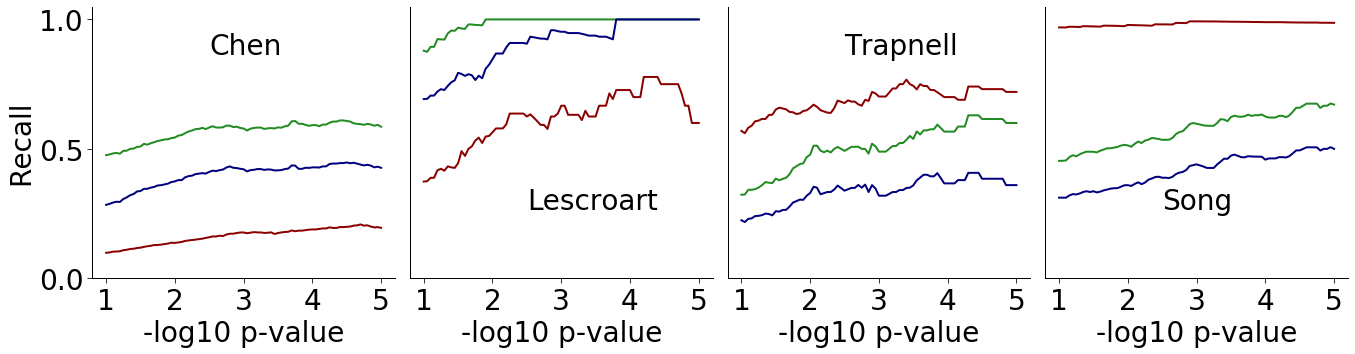

In [157]:
def plot_curves(ax, test_data, which_curve = 0):
    
    names = ['Recall', 'Precision', 'Specificity', 'F1 score', 'Recall/Specificity', 
             'LR+', 'LR-', 'Diagnostic Odds Ratio', 'Accuracy', 'Balanced Accuracy']
    
    name = names[which_curve]
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    
    
    
    p_limits = 10**(-np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05))
    summary_mrna = summary_curves(pvals, selected_mrna, p_limits, 1)[which_curve]
    summary_mrna_only = summary_curves(pvals, selected_mrna_only, p_limits, 1)[which_curve]
    summary_read = summary_curves(pvals, selected_read, p_limits, 1)[which_curve]
    
    
    ax.plot(-np.log10(p_limits), summary_read, c='darkred', label='read filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna_only, c='forestgreen', label='mRNA only filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna, c='navy', label='mRNA filter', linewidth=2)
    ax.set_xlabel('-log10 p-value', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
#     ax.set_xticks([0, 0.5, 1])
#     ax.set_xticklabels(['0.0', '0.5', '1.0'])
    
    ax.tick_params(labelsize=28, length=5)

    
    
figsize(22.5, 5)
fig = plt.figure()

# fig.suptitle('p-values of anova test', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((0,1.05))
ax_2.set_ylim((0,1.05))
ax_3.set_ylim((0,1.05))
ax_4.set_ylim((0,1.05))

plot_curves(ax_1, chen_data_out, 0)
plot_curves(ax_2, lescroart_data_out, 0)
plot_curves(ax_3, trapnell_data_out, 0)
plot_curves(ax_4, song_data_out, 0)

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')


ax_1.text(2.5, 0.95, 'Chen', fontsize=28, verticalalignment='top')
ax_2.text(2.5, 0.35, 'Lescroart', fontsize=28, verticalalignment='top')
ax_3.text(2.5, 0.95, 'Trapnell', fontsize=28, verticalalignment='top')
ax_4.text(2.5, 0.35, 'Song', fontsize=28, verticalalignment='top')


ax_1.set_xticks([1, 2, 3, 4, 5])
ax_1.set_xticklabels(['1', '2', '3', '4', '5'])
ax_2.set_xticks([1, 2, 3, 4, 5])
ax_2.set_xticklabels(['1', '2', '3', '4', '5'])
ax_3.set_xticks([1, 2, 3, 4, 5])
ax_3.set_xticklabels(['1', '2', '3', '4', '5'])
ax_4.set_xticks([1, 2, 3, 4, 5])
ax_4.set_xticklabels(['1', '2', '3', '4', '5'])
            
ax_1.set_ylabel('Recall', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/anova/recall.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/recall.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/recall.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




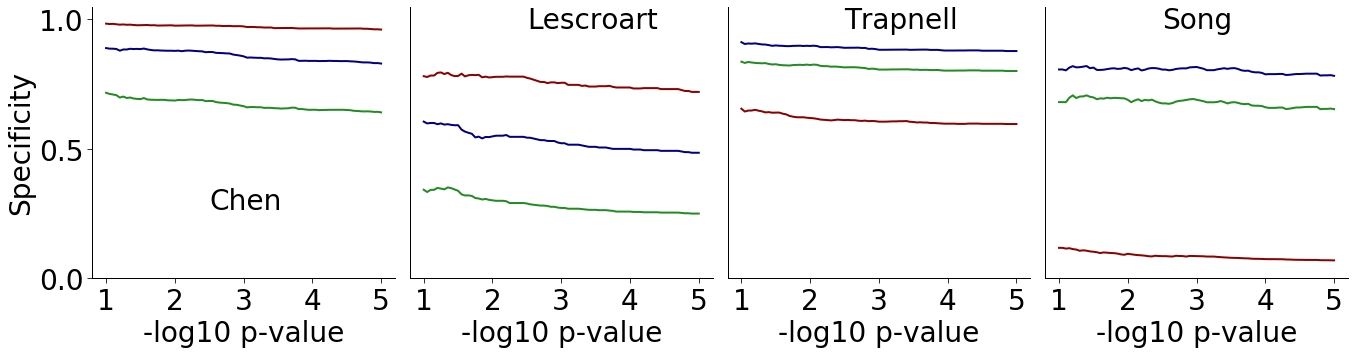

In [158]:
def plot_curves(ax, test_data, which_curve = 0):
    
    names = ['Recall', 'Precision', 'Specificity', 'F1 score', 'Recall/Specificity', 
             'LR+', 'LR-', 'Diagnostic Odds Ratio', 'Accuracy', 'Balanced Accuracy']
    
    name = names[which_curve]
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    
    
    
    p_limits = 10**(-np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05))
    summary_mrna = summary_curves(pvals, selected_mrna, p_limits, 1)[which_curve]
    summary_mrna_only = summary_curves(pvals, selected_mrna_only, p_limits, 1)[which_curve]
    summary_read = summary_curves(pvals, selected_read, p_limits, 1)[which_curve]
    
    
    ax.plot(-np.log10(p_limits), summary_read, c='darkred', label='read filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna_only, c='forestgreen', label='mRNA only filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna, c='navy', label='mRNA filter', linewidth=2)
    ax.set_xlabel('-log10 p-value', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
#     ax.set_xticks([0, 0.5, 1])
#     ax.set_xticklabels(['0.0', '0.5', '1.0'])
    
    ax.tick_params(labelsize=28, length=5)

    
    
figsize(22.5, 5)
fig = plt.figure()

# fig.suptitle('p-values of anova test', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((0,1.05))
ax_2.set_ylim((0,1.05))
ax_3.set_ylim((0,1.05))
ax_4.set_ylim((0,1.05))

plot_curves(ax_1, chen_data_out, 2)
plot_curves(ax_2, lescroart_data_out, 2)
plot_curves(ax_3, trapnell_data_out, 2)
plot_curves(ax_4, song_data_out, 2)

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')


ax_1.text(2.5, 0.35, 'Chen', fontsize=28, verticalalignment='top')
ax_2.text(2.5, 1.05, 'Lescroart', fontsize=28, verticalalignment='top')
ax_3.text(2.5, 1.05, 'Trapnell', fontsize=28, verticalalignment='top')
ax_4.text(2.5, 1.05, 'Song', fontsize=28, verticalalignment='top')


ax_1.set_xticks([1, 2, 3, 4, 5])
ax_1.set_xticklabels(['1', '2', '3', '4', '5'])
ax_2.set_xticks([1, 2, 3, 4, 5])
ax_2.set_xticklabels(['1', '2', '3', '4', '5'])
ax_3.set_xticks([1, 2, 3, 4, 5])
ax_3.set_xticklabels(['1', '2', '3', '4', '5'])
ax_4.set_xticks([1, 2, 3, 4, 5])
ax_4.set_xticklabels(['1', '2', '3', '4', '5'])
            
ax_1.set_ylabel('Specificity', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/anova/specificity.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/specificity.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/specificity.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




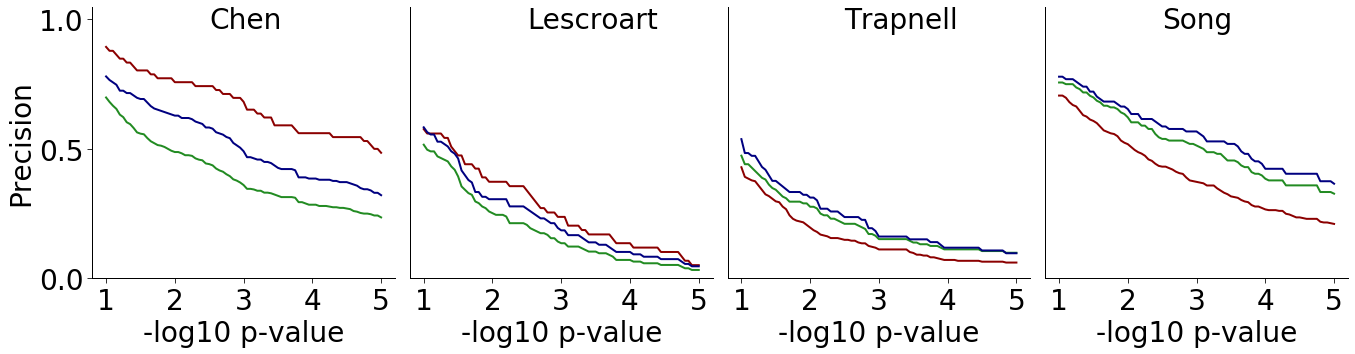

In [159]:
def plot_curves(ax, test_data, which_curve = 0):
    
    names = ['Recall', 'Precision', 'Specificity', 'F1 score', 'Recall/Specificity', 
             'LR+', 'LR-', 'Diagnostic Odds Ratio', 'Accuracy', 'Balanced Accuracy']
    
    name = names[which_curve]
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    
    
    
    p_limits = 10**(-np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05))
    summary_mrna = summary_curves(pvals, selected_mrna, p_limits, 1)[which_curve]
    summary_mrna_only = summary_curves(pvals, selected_mrna_only, p_limits, 1)[which_curve]
    summary_read = summary_curves(pvals, selected_read, p_limits, 1)[which_curve]
    
    
    ax.plot(-np.log10(p_limits), summary_read, c='darkred', label='read filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna_only, c='forestgreen', label='mRNA only filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna, c='navy', label='mRNA filter', linewidth=2)
    ax.set_xlabel('-log10 p-value', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
#     ax.set_xticks([0, 0.5, 1])
#     ax.set_xticklabels(['0.0', '0.5', '1.0'])
    
    ax.tick_params(labelsize=28, length=5)

    
    
figsize(22.5, 5)
fig = plt.figure()

# fig.suptitle('p-values of anova test', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((0,1.05))
ax_2.set_ylim((0,1.05))
ax_3.set_ylim((0,1.05))
ax_4.set_ylim((0,1.05))

plot_curves(ax_1, chen_data_out, 1)
plot_curves(ax_2, lescroart_data_out, 1)
plot_curves(ax_3, trapnell_data_out, 1)
plot_curves(ax_4, song_data_out, 1)

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')


ax_1.text(2.5, 1.05, 'Chen', fontsize=28, verticalalignment='top')
ax_2.text(2.5, 1.05, 'Lescroart', fontsize=28, verticalalignment='top')
ax_3.text(2.5, 1.05, 'Trapnell', fontsize=28, verticalalignment='top')
ax_4.text(2.5, 1.05, 'Song', fontsize=28, verticalalignment='top')


ax_1.set_xticks([1, 2, 3, 4, 5])
ax_1.set_xticklabels(['1', '2', '3', '4', '5'])
ax_2.set_xticks([1, 2, 3, 4, 5])
ax_2.set_xticklabels(['1', '2', '3', '4', '5'])
ax_3.set_xticks([1, 2, 3, 4, 5])
ax_3.set_xticklabels(['1', '2', '3', '4', '5'])
ax_4.set_xticks([1, 2, 3, 4, 5])
ax_4.set_xticklabels(['1', '2', '3', '4', '5'])
            
ax_1.set_ylabel('Precision', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/anova/precision.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/precision.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/precision.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




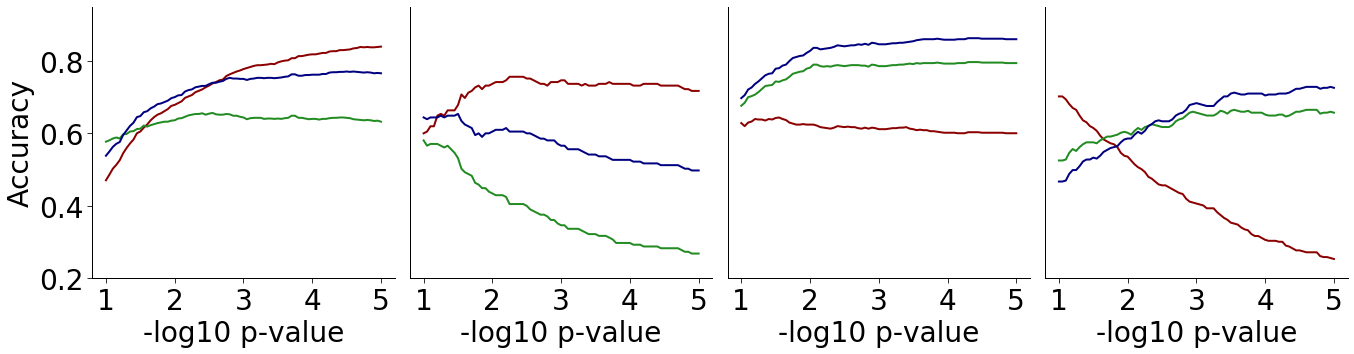

In [161]:
def plot_curves(ax, test_data, which_curve = 0):
    
    names = ['Recall', 'Precision', 'Specificity', 'F1 score', 'Recall/Specificity', 
             'LR+', 'LR-', 'Diagnostic Odds Ratio', 'Accuracy', 'Balanced Accuracy']
    
    name = names[which_curve]
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    
    
    
    p_limits = 10**(-np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05))
    summary_mrna = summary_curves(pvals, selected_mrna, p_limits, 1)[which_curve]
    summary_mrna_only = summary_curves(pvals, selected_mrna_only, p_limits, 1)[which_curve]
    summary_read = summary_curves(pvals, selected_read, p_limits, 1)[which_curve]
    
    
    ax.plot(-np.log10(p_limits), summary_read, c='darkred', label='read filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna_only, c='forestgreen', label='mRNA only filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna, c='navy', label='mRNA filter', linewidth=2)
    ax.set_xlabel('-log10 p-value', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
#     ax.set_xticks([0, 0.5, 1])
#     ax.set_xticklabels(['0.0', '0.5', '1.0'])
    
    ax.tick_params(labelsize=28, length=5)

    
    
figsize(22.5, 5)
fig = plt.figure()

# fig.suptitle('p-values of anova test', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

# ax_1.set_ylim((-0.05,1.05))
# ax_2.set_ylim((-0.05,1.05))
# ax_3.set_ylim((-0.05,1.05))
# ax_4.set_ylim((-0.05,1.05))

plot_curves(ax_1, chen_data_out, 8)
plot_curves(ax_2, lescroart_data_out, 8)
plot_curves(ax_3, trapnell_data_out, 8)
plot_curves(ax_4, song_data_out, 8)

ax_1.set_ylim((0.2,0.95))
ax_2.set_ylim((0.2,0.95))
ax_3.set_ylim((0.2,0.95))
ax_4.set_ylim((0.2,0.95))

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')


# ax_1.text(0.05, 1, 'Chen', fontsize=28, verticalalignment='top')
# ax_2.text(0.05, 1, 'Lescroart', fontsize=28, verticalalignment='top')
# ax_3.text(0.05, 1, 'Trapnell', fontsize=28, verticalalignment='top')
# ax_4.text(0.05, 1, 'Song', fontsize=28, verticalalignment='top')


ax_1.set_xticks([1, 2, 3, 4, 5])
ax_1.set_xticklabels(['1', '2', '3', '4', '5'])
ax_2.set_xticks([1, 2, 3, 4, 5])
ax_2.set_xticklabels(['1', '2', '3', '4', '5'])
ax_3.set_xticks([1, 2, 3, 4, 5])
ax_3.set_xticklabels(['1', '2', '3', '4', '5'])
ax_4.set_xticks([1, 2, 3, 4, 5])
ax_4.set_xticklabels(['1', '2', '3', '4', '5'])
            
ax_1.set_ylabel('Accuracy', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/anova/accuracy.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/accuracy.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/accuracy.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




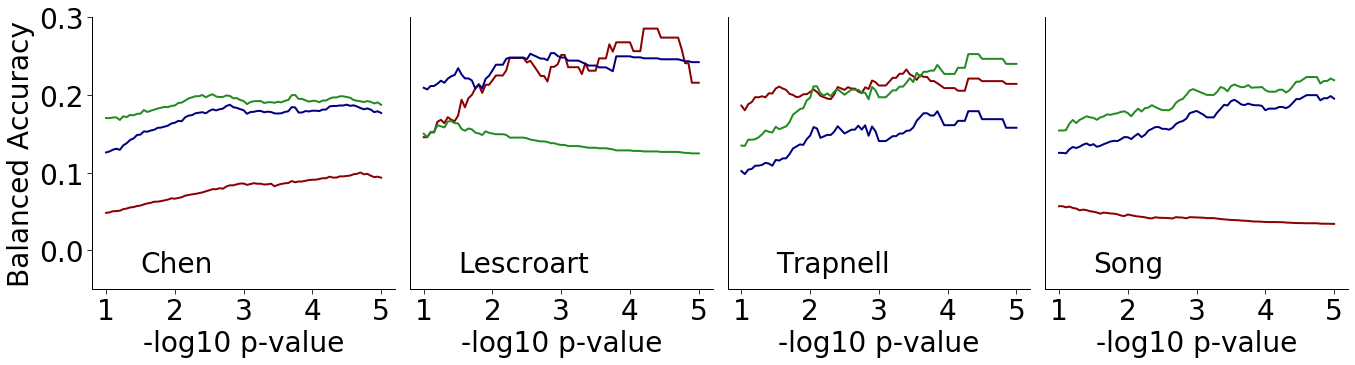

In [160]:
def plot_curves(ax, test_data, which_curve = 0):
    
    names = ['Recall', 'Precision', 'Specificity', 'F1 score', 'Recall/Specificity', 
             'LR+', 'LR-', 'Diagnostic Odds Ratio', 'Accuracy', 'Balanced Accuracy']
    
    name = names[which_curve]
    
    pvals, selected_mrna, selected_mrna_only, selected_read = test_data
    
    
    
    
    p_limits = 10**(-np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05))
    summary_mrna = summary_curves(pvals, selected_mrna, p_limits, 1)[which_curve]
    summary_mrna_only = summary_curves(pvals, selected_mrna_only, p_limits, 1)[which_curve]
    summary_read = summary_curves(pvals, selected_read, p_limits, 1)[which_curve]
    
    
    ax.plot(-np.log10(p_limits), summary_read, c='darkred', label='read filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna_only, c='forestgreen', label='mRNA only filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna, c='navy', label='mRNA filter', linewidth=2)
    ax.set_xlabel('-log10 p-value', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
#     ax.set_xticks([0, 0.5, 1])
#     ax.set_xticklabels(['0.0', '0.5', '1.0'])
    
    ax.tick_params(labelsize=28, length=5)

    
    
figsize(22.5, 5)
fig = plt.figure()

# fig.suptitle('p-values of anova test', fontsize=28)

gs = GridSpec(1,4)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((-0.05,0.3))
ax_2.set_ylim((-0.05,0.3))
ax_3.set_ylim((-0.05,0.3))
ax_4.set_ylim((-0.05,0.3))

plot_curves(ax_1, chen_data_out, 9)
plot_curves(ax_2, lescroart_data_out, 9)
plot_curves(ax_3, trapnell_data_out, 9)
plot_curves(ax_4, song_data_out, 9)

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
ax_4.yaxis.set_ticks_position('none')


ax_1.text(1.5, 0, 'Chen', fontsize=28, verticalalignment='top')
ax_2.text(1.5, 0, 'Lescroart', fontsize=28, verticalalignment='top')
ax_3.text(1.5, 0, 'Trapnell', fontsize=28, verticalalignment='top')
ax_4.text(1.5, 0, 'Song', fontsize=28, verticalalignment='top')


ax_1.set_xticks([1, 2, 3, 4, 5])
ax_1.set_xticklabels(['1', '2', '3', '4', '5'])
ax_2.set_xticks([1, 2, 3, 4, 5])
ax_2.set_xticklabels(['1', '2', '3', '4', '5'])
ax_3.set_xticks([1, 2, 3, 4, 5])
ax_3.set_xticklabels(['1', '2', '3', '4', '5'])
ax_4.set_xticks([1, 2, 3, 4, 5])
ax_4.set_xticklabels(['1', '2', '3', '4', '5'])
            
ax_1.set_ylabel('Balanced Accuracy', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

plt.savefig('plots_review/figure3/anova/balanced_accuracy.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/balanced_accuracy.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots_review/figure3/anova/balanced_accuracy.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




In [ ]:
# recall_list, precision_list, specificity_list, f1_score_list, hrs_list, LRplus_list, LRminus_list, DOR_list, ACC_list, BA_list